<h1> </h1>
<h1><center> <b>Estática y Dinámica (IN1053C)</b></center></h1>

<h4><center>MSc. Alejandro Saavedra</center></h4>

<center> <a href = "https://github.com/AleSaa66"> GitHub: AleSaa66 </a></center>

<h3><center> <b> Animación del movimiento circular</b></center></h3>

In [1]:
#Librerías de Python a utilizar:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.animation as animation

plt.style.use('bmh')            #Estilo de los gráficos.

<h3><left> <b>Marco conceptual:</b> </left></h3>

Considere las coordenadas $(x,y)$ de una partícula que describe un movimiento circular de radio $R$ con aceleración angular constante $\alpha$:
$$
\begin{aligned}
x(t) &= R \cos(\theta(t)), \\
y(t) &= R \sin(\theta(t)),
\end{aligned}
$$
donde el ángulo $\theta$ y la rapidez angular $\omega$ están dadas por
\begin{align*}
\theta(t) &= \theta_i + \omega_i(t-t_i) + \frac{1}{2} \alpha (t-t_i)^2, \\
\omega(t) &= \omega_i + \alpha (t - t_i),
\end{align*} 
con $\theta_i$ el ángulo inicial, $\omega_i$ la rapidez angular inicial y $t_i$ el tiempo inicial.

El vector posición de la partícula queda entonces descrito por 
$$\vec{r} = R \left(\cos(\theta) \, \hat{\imath} + \sin(t) \, \hat{\jmath} \right).$$

Por otro lado, su velocidad y aceleración están dados, respectivamente, por los siguientes vectores:
$$
\begin{aligned}
\vec{v} &= R \omega \left(-\sin(\theta) \, \hat{\imath} + \cos(t) \, \hat{\jmath} \right), \\
\vec{a} &= \vec{a}_{\rm C} + \vec{a}_{\rm T},
\end{aligned}
$$
donde la aceleración centrípeta $\vec{a}_{\rm C}$ y la aceleración tangencial $\vec{a}_{\rm T}$ están dadas, respectivamente, por
\begin{aligned}
\vec{a}_{\rm C} &= - R \omega^2 \left(\cos(\theta) \, \hat{\imath} + \sin(t) \, \hat{\jmath} \right), \\
\vec{a}_{\rm T} &= R \alpha \left(-\sin(\theta) \, \hat{\imath} + \cos(t) \, \hat{\jmath} \right).
\end{aligned}

In [ ]:
#1) Parámetros:

#Condiciones iniciales (modificar sólo esta parte):
R = 1               #[m]
t_i = 0             #[s]
t_f = np.pi/5             #[s]
theta_i = 0         #[rad]
omega_i = 10        #[1/s]
alpha = 8           #[1/s^2]

In [22]:
#2) Componentes de la posición y velocidad:
def pos(t):
    theta = theta_i + omega_i*(t - t_i) + 0.5*alpha*(t - t_i)**2
    omega = omega_i + alpha*(t - t_i)

    x = R*np.cos(theta)
    y = R*np.sin(theta)

    return x,y

def velo(t):
    theta = theta_i + omega_i*(t - t_i) + 0.5*alpha*(t - t_i)**2
    omega = omega_i + alpha*(t - t_i)

    v_x = - R*omega*np.sin(theta)
    v_y = R*omega*np.cos(theta)
    
    return v_x,v_y

def acel_tangencial(t):
    theta = theta_i + omega_i*(t - t_i) + 0.5*alpha*(t - t_i)**2
    omega = omega_i + alpha*(t - t_i)

    a_xT = -R*alpha*np.sin(theta)
    a_yT = R*alpha*np.cos(theta)

    return a_xT,a_yT

def acel_centripeta(t):
    theta = theta_i + omega_i*(t - t_i) + 0.5*alpha*(t - t_i)**2
    omega = omega_i + alpha*(t - t_i)

    a_xC = -R*omega**2*np.cos(theta)
    a_yC = -R*omega**2*np.sin(theta)

    return a_xC,a_yC

In [23]:
#3) Variables para graficar la trayectoria completa:
N = 500                             #Número de puntos de la partición del intervalo de tiempo.
t_T = np.linspace(t_i,t_f,N)        #El intervalo de tiempo empieza desde el tiempo inicial t_i hasta el tiempo de final t_f.
x_T, y_T = pos(t_T)                 #Arreglo con las coordenadas x e y de la trayectoria

In [24]:
#5) Función que actualiza los frames:
def update(i,t):
    ax.clear()     #Clear axis

    #4.1) Coordenadas de la posición, velocidad y aceleración (tangencial y centrípeta) en el tiempo t:
    x,y = pos(t[i])
    v_x, v_y = velo(t[i])
    a_xT, a_yT = acel_tangencial(t[i])
    a_xC, a_yC = acel_centripeta(t[i])        

    #4.2) Gráfica de la trayectoria y el centro de la circunferencia:
    plt.plot(x_T,y_T,color = 'black',linewidth = 1.3,alpha = 0.7)
    plt.scatter(0,0,color = 'black',s = 40,marker='x')

    #4.3) Posición inicial y posición en el tiempo t:
    plt.scatter(x_T[0],y_T[0],s = 60,marker = 'o',linewidth = 1.2,color = 'green', edgecolors='black',zorder = 3,label = 'Posición Inicial')
    plt.scatter(x,y,s = 60,marker = 'o',linewidth = 1.2,color = 'red', edgecolors='black',zorder = 4)

    #4.4) Gráfico del vector posición:
    # #Vector posición:
    # tail = [0,0]              #Inicio del vector posición    
    # q = plt.quiver(*tail,x,y,angles="xy",scale_units="xy",scale=1,facecolor='firebrick',headaxislength = 4,width = 0.006,zorder = 3)
        
    #Texto de las coordenadas x e y en el tiempo t:
    text_kwargs = dict(ha='center', va='center', fontsize=15, color='black')
    x_txt = r'$'+str(round(x,5))+'$'
    y_txt = r'$'+str(round(y,5))+'$'
    plt.text(2*R, 1.1*R, r'$x = $' + x_txt + r'$\ {\rm m}$',**text_kwargs, bbox = dict(boxstyle="round",ec='firebrick',fc=(1., 0.8, 0.8),linewidth = 1.2))
    plt.text(2*R, 0.9*R, r'$y = $' + y_txt + r'$\ {\rm m}$',**text_kwargs,bbox = dict(boxstyle="round",ec='firebrick',fc=(1., 0.8, 0.8),linewidth = 1.2))

    #4.5) Gráfico del vector velocidad:
    tail_new = [x,y]                    #Inicio de los vectores velocidad y aceleración
        
    #Vector velocidad:
    q_1 = plt.quiver(*tail_new,v_x,v_y,angles="xy",scale_units="xy", scale = 25, linewidth = 0.5,facecolor='navy',headaxislength = 4,width = 0.005,zorder = 3)

    #Texto de las componentes v_x y v_y en el tiempo t:
    text_kwargs1 = dict(ha='center', va='center', fontsize=15, color='black')
    norm_v = np.sqrt(v_x**2 + v_y**2)
    v_txt = r'$'+str(round(norm_v,5))+'$'
    plt.text(2*R, 0.5*R, r'$v = $' + v_txt + r'$\ {\rm m/s}$',**text_kwargs1,bbox = dict(boxstyle="round",ec='navy',fc=(0.8, 0.9, 1.0),linewidth = 1.2))

    #4.6) Gráfico de la aceleración centrípeta:
        #Vector aceleración centrípeta:
    norm_a_c = np.sqrt(a_xC**2 + a_yC**2)
    q_2 = plt.quiver(*tail_new,a_xC/norm_a_c,a_yC/norm_a_c,angles="xy",scale_units="xy", scale = 2, linewidth = 2,facecolor='purple',headaxislength = 4,width = 0.007,zorder = 2,alpha = 0.7)

    #Texto del módulo de la aceleración centrípeta en el tiempo t:
    text_kwargs2 = dict(ha='center', va='center', fontsize=15, color='black')
    a_c_txt = r'$'+str(round(norm_a_c,5))+'$'
    plt.text(2*R, 0.1*R, r'$a_{\, \rm centrípeta} = $' + a_c_txt + r'$\ {\rm m/s^2}$',**text_kwargs2,bbox = dict(boxstyle="round",ec=(0.5, 0.0, 0.5),fc=(0.95, 0.9, 0.98),linewidth = 1.2))

    #4.7) Gráfico de la aceleración tangencial:
    #Vector aceleración tangencial:
    if alpha == 0:
        norm_a_t = 1        #Para evitar divergencia al dividir por la norma en el MCU
        a_t_txt = r'$'+str(round(0,5))+'$'
    else:          
        norm_a_t = np.sqrt(a_xT**2 + a_yT**2)
        a_t_txt = r'$'+str(round(norm_a_t,5))+'$'

    q_3 = plt.quiver(*tail_new,a_xT/norm_a_t,a_yT/norm_a_t,angles="xy",scale_units="xy", scale = 2, linewidth = 2,facecolor='magenta',headaxislength = 4,width = 0.007,zorder = 2,alpha = 0.7)

    #Texto del módulo de la aceleración tangencial en el tiempo t:
    text_kwargs3 = dict(ha='center', va='center', fontsize=15, color='black')
    plt.text(2*R, -0.15*R, r'$a_{\, \rm tangencial} = $' + a_t_txt + r'$\ {\rm m/s^2}$',**text_kwargs3,bbox = dict(boxstyle="round",ec='magenta',fc=(0.98, 0.9, 0.97),linewidth = 1.2))

    #4.8) Gráfico de la aceleración total:
    a_total_x = a_xC/norm_a_c + a_xT/norm_a_t
    a_total_y = a_yC/norm_a_c + a_yT/norm_a_t

    q_4 = plt.quiver(*tail_new,a_total_x,a_total_y,angles="xy",scale_units="xy", scale = 2, linewidth = 2,facecolor='darkgreen',headaxislength = 4,width = 0.007,zorder = 2)

    #Texto del módulo de la aceleración total en el tiempo t:
    text_kwargs4 = dict(ha='center', va='center', fontsize=15, color='black')
    norm_a_total = np.sqrt((a_xC + a_xT)**2 + (a_yC + a_yT)**2)
    a_total_txt = r'$'+str(round(norm_a_total,5))+'$'
    plt.text(2*R, -0.4*R, r'$a_{\, \rm total} = $' + a_total_txt + r'$\ {\rm m/s^2}$',**text_kwargs4,bbox = dict(boxstyle="round",ec='darkgreen',fc=(0.9, 1.0, 0.9),linewidth = 1.2))

    #4.9) Texto del ángulo, rapidez angular y aceleración angular:
    text_kwargs5 = dict(ha='center', va='center', fontsize=15, color='black')

    #Ángulo:
    theta = (theta_i + omega_i*(t[i] - t_i) + 0.5*alpha*(t[i] - t_i)**2)%(2*np.pi)        #ángulo en radianes entre 0 y 2pi
    theta_grad = theta*180/np.pi

    #Rapidez angular:
    omega = omega_i + alpha*(t[i] - t_i)

    #Texto:
    theta_txt =  r'$'+str(round(theta,4))+'$'
    theta_grad_txt =  r'$'+str(round(theta_grad,4))+'$'
    w_txt =  r'$'+str(round(omega,5))+'$'
    alpha_txt = r'$'+str(round(alpha,5))+'$'
    
    plt.text(2*R, -0.8*R, r'$\theta = $' + theta_txt +r'$\ {\rm rad} = $'+theta_grad_txt+r'$^{\circ}$',**text_kwargs5,bbox = dict(boxstyle="round",ec='dimgray',fc=(0.95, 0.95, 0.95),linewidth = 1.2))
    plt.text(2*R, -1*R, r'$\omega = $' + w_txt +r'$\ {\rm s^{-1}}$',**text_kwargs5,bbox = dict(boxstyle="round",ec='dimgray',fc=(0.95, 0.95, 0.95),linewidth = 1.2))
    plt.text(2*R, -1.2*R, r'$\alpha = $' + alpha_txt + r'$\ {\rm s^{-2}}$',**text_kwargs5,bbox = dict(boxstyle="round",ec='dimgray',fc=(0.95, 0.95, 0.95),linewidth = 1.2))

    #4.10) Estética del plot:
    ax.set_facecolor("white")
    plt.grid(False)


    plt.xlim(-1.2*R,1.2*R)    
    plt.ylim(-1.2*R,1.2*R)

    plt.xlabel(r'$x \ {\rm (m)}$',fontsize = 15)
    plt.ylabel(r'$y \ {\rm (m)}$',fontsize = 15)
    plt.legend(loc = 'best')

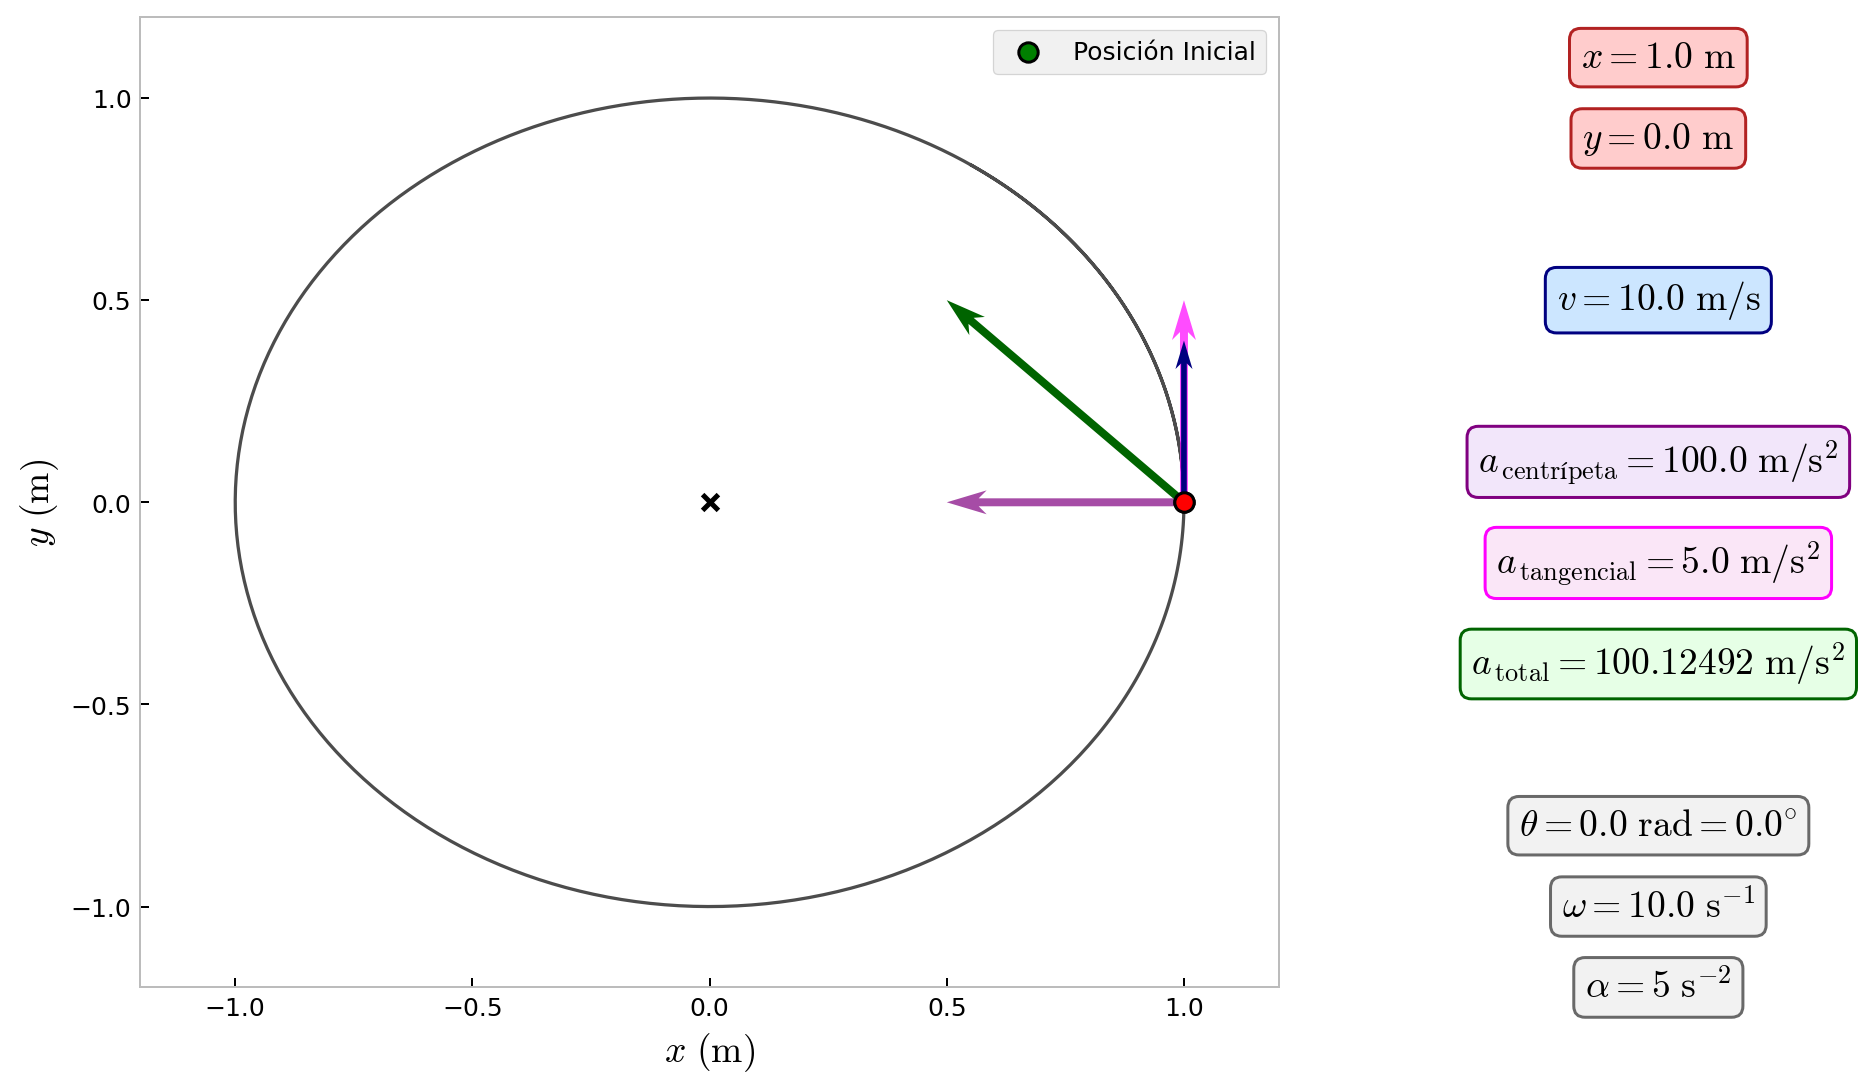

In [25]:
#6) Creación de la figura y ejes que contienen la animación:
fig, ax = plt.subplots(figsize=(11,7),dpi = 180)
fig.subplots_adjust(right=0.7) 

anim = animation.FuncAnimation(fig, func = update, fargs = (t_T,), frames = len(t_T), interval = 1)
anim.save('MCUA-Animation.gif')